In [1]:
#Twiter Stock Market Analysis

#Importing of the libraries
#1)	Import necessary and essential libraries

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio

pio.templates.default = "plotly_white"

In [2]:
#Read the data and display the first 100 rows from the data
data1 = pd.read_excel("/content/HousePrediction (1).xlsx")
data1.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [3]:
# 2)	Give the column insights

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
# 3)	Check whether this dataset contains any null values or not if it is there then remove the null values from it
# Q1) Checking for Missing Values

data1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [5]:
data1 = data1.dropna()

In [6]:
data1.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [7]:
# 4)	Find the statistical description of the data.

data1.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,421.610009,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,364.750000,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,729.500000,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,1094.250000,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,1459.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


In [8]:
#2.	All the numerical Variables
numerical_cols = data1.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

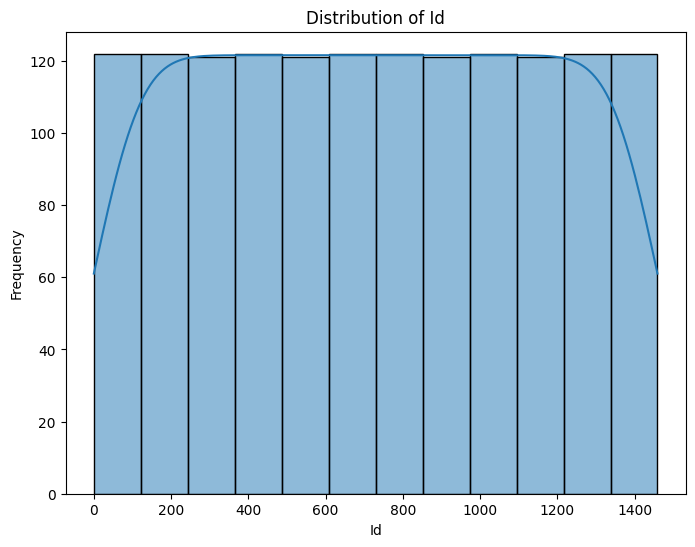

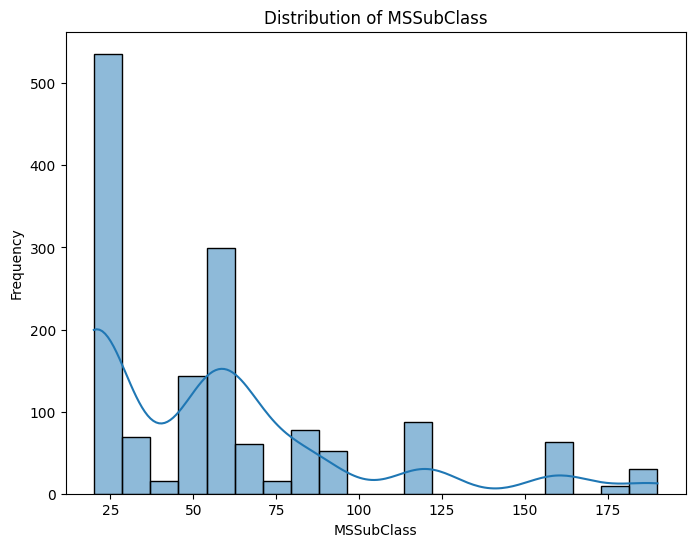

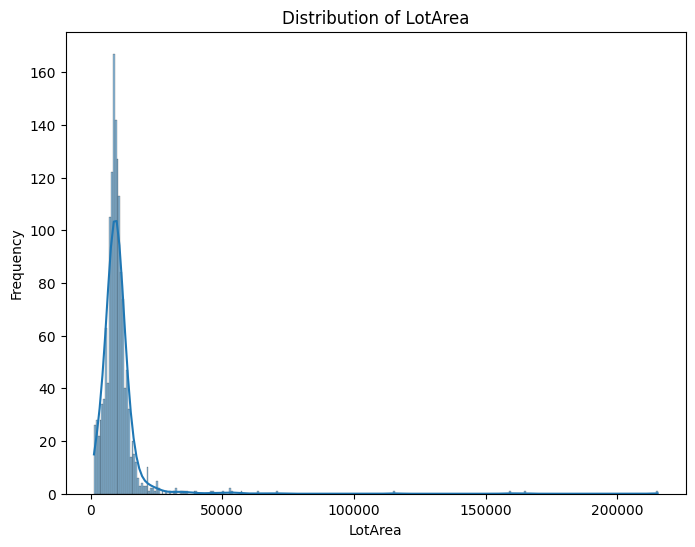

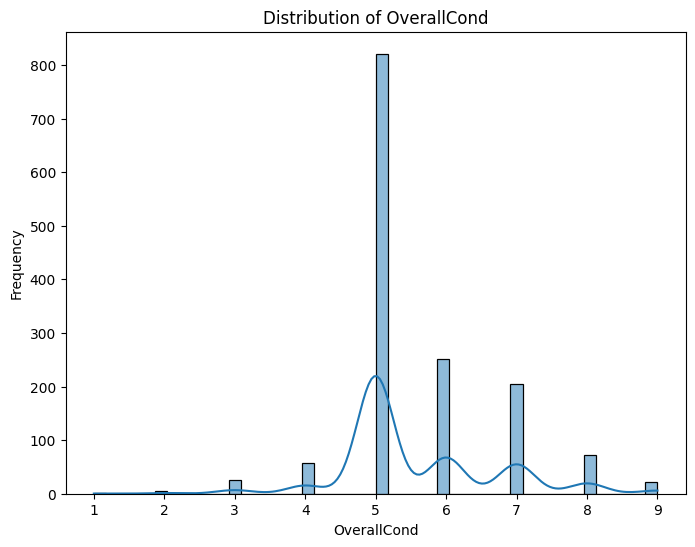

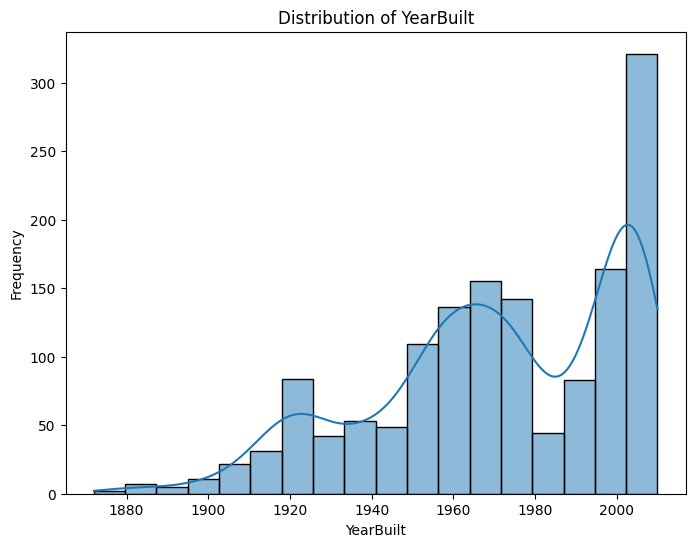

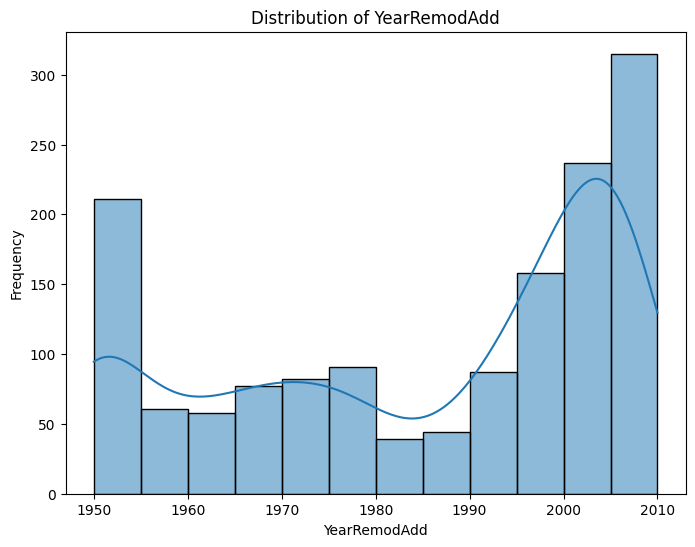

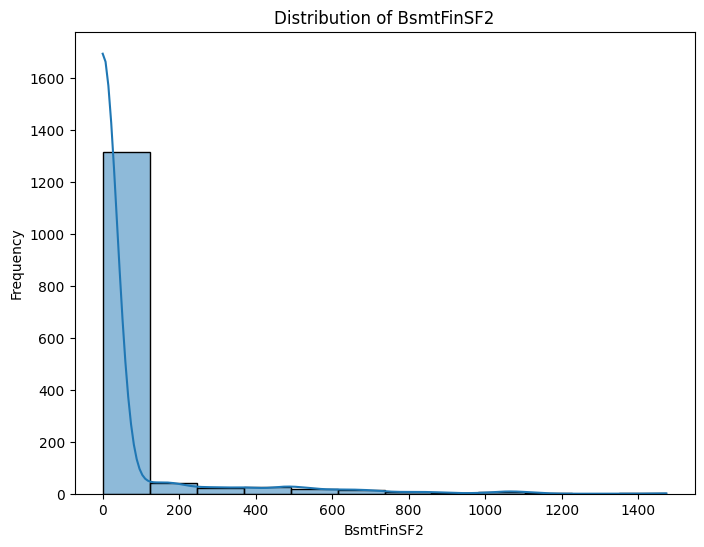

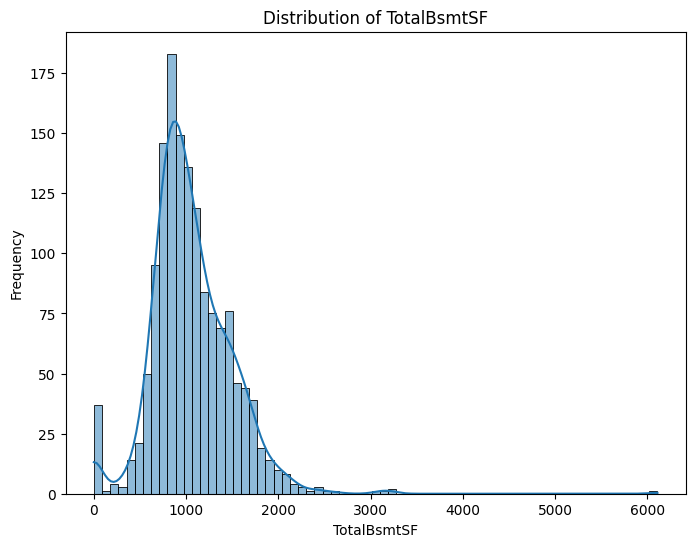

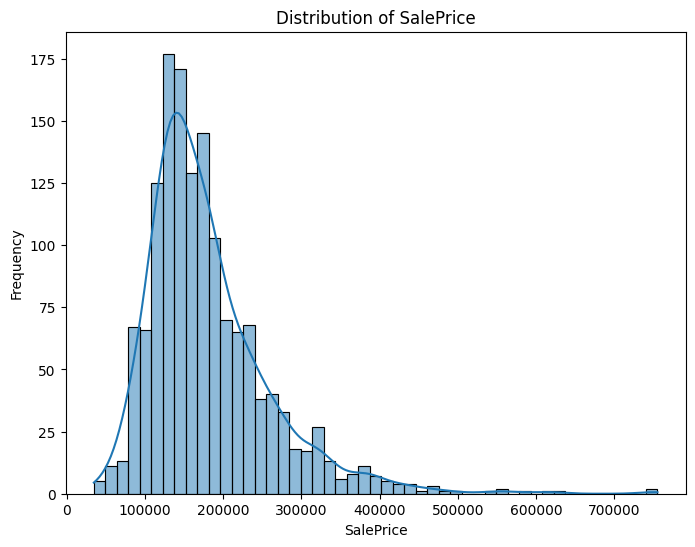

In [9]:
#3.	Distribution of the numerical Variables
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
#4.	Categorical Variables
categorical_cols = data1.select_dtypes(include=['object']).columns
categorical_cols



Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

In [11]:
#5.	Outliers
''' Detect Outliers Using Z-Score:
The z-score represents how many standard deviations an observation is from the mean. Typically, values with a z-score greater than 3 or less than -3 are considered outliers.'''

from scipy import stats

outlier_indices = []
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(data1[col]))
    outlier_indices.extend(np.where(z_scores > 3)[0])

outlier_indices = list(set(outlier_indices))
outlier_indices


[1030,
 519,
 520,
 9,
 523,
 527,
 1040,
 1044,
 1046,
 535,
 24,
 542,
 1059,
 548,
 1062,
 48,
 52,
 53,
 1077,
 58,
 577,
 583,
 586,
 591,
 599,
 88,
 93,
 1123,
 1132,
 113,
 1137,
 116,
 630,
 1142,
 1144,
 635,
 1149,
 125,
 637,
 1152,
 1169,
 661,
 664,
 153,
 666,
 1182,
 1186,
 676,
 165,
 1190,
 166,
 178,
 691,
 185,
 697,
 1213,
 703,
 191,
 705,
 706,
 1220,
 713,
 726,
 218,
 1243,
 224,
 1253,
 745,
 233,
 747,
 241,
 1266,
 1268,
 246,
 249,
 250,
 764,
 253,
 769,
 260,
 263,
 271,
 273,
 1298,
 785,
 1299,
 1308,
 798,
 291,
 803,
 1320,
 300,
 1327,
 304,
 312,
 313,
 828,
 322,
 1349,
 1352,
 842,
 332,
 335,
 848,
 854,
 1369,
 861,
 1373,
 349,
 355,
 1387,
 1393,
 1396,
 375,
 888,
 378,
 384,
 898,
 389,
 1416,
 1418,
 398,
 918,
 411,
 1435,
 923,
 414,
 924,
 1445,
 1457,
 1458,
 440,
 446,
 451,
 969,
 457,
 461,
 980,
 470,
 985,
 473,
 991,
 488,
 493,
 496,
 508]

In [12]:
#6.	Relationship between Dependent and Independent Features
#Identify which column is your dependent variable (target) and which columns are independent variables (features).

dependent_variable = 'LotArea'
independent_variables = ['OverallCond', 'YearBuilt', 'LotConfig']  # List of independent variable names
dependent_variable
independent_variables


['OverallCond', 'YearBuilt', 'LotConfig']

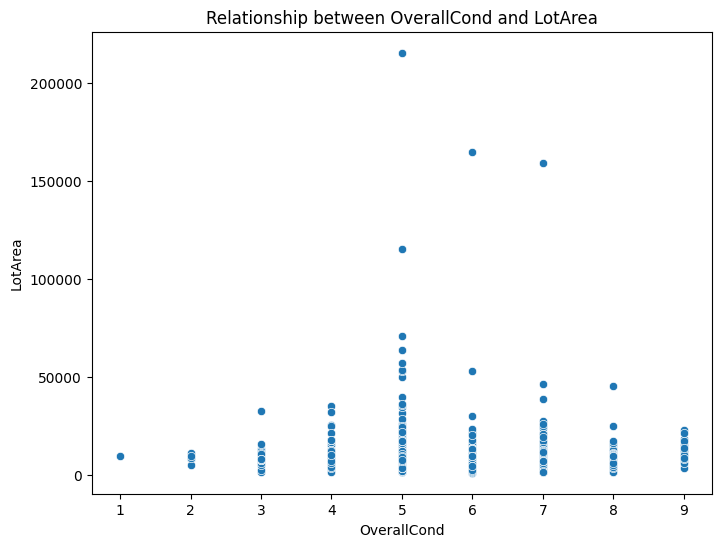

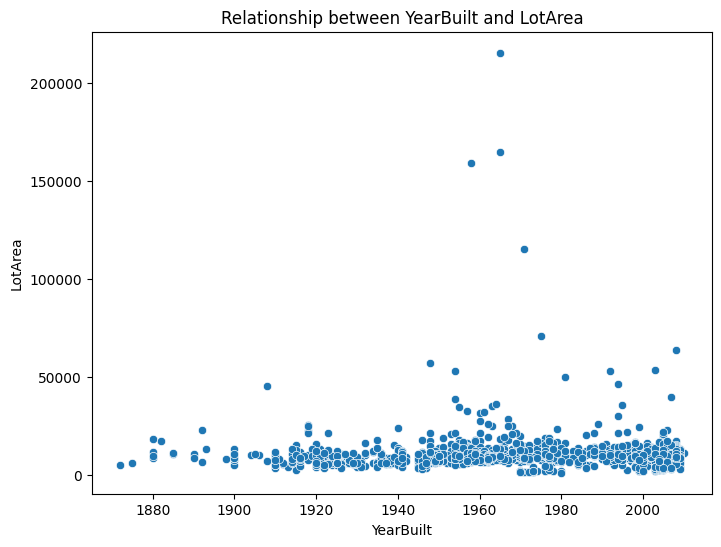

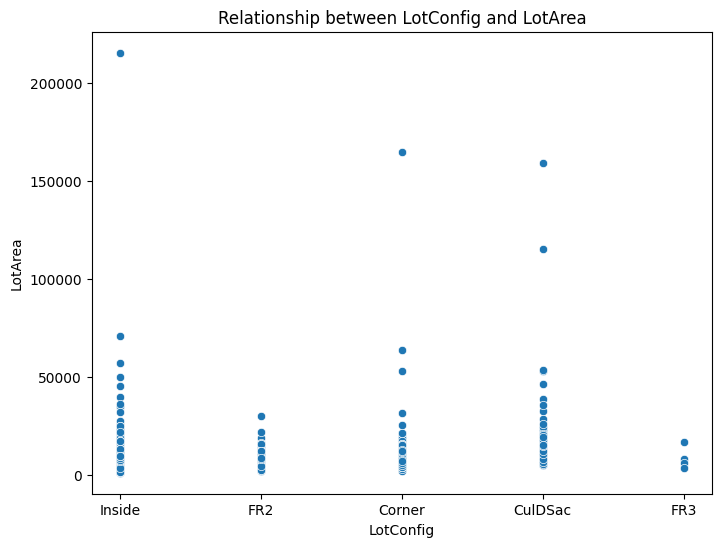

In [13]:
# Use scatter plots to visualize the relationship between each independent variable and the dependent variable.
for feature in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y=dependent_variable,data = data1)
    plt.title(f'Relationship between {feature} and {dependent_variable}')
    plt.xlabel(feature)
    plt.ylabel(dependent_variable)
    plt.show()

In [18]:
#7.	Correlations  between Discrete vs Sales Price && Continuous vs Sales Price

discrete_variables = ['LotArea', 'YearBuilt']
continuous_variables = ['TotalBsmtSF', 'BsmtFinSF2']
discrete_variables
continuous_variables

#Calculate the correlation coefficients between each independent variable and the sales price.

correlation_discrete = data1[discrete_variables + ['SalePrice']].corr()
correlation_continuous = data1[continuous_variables + ['SalePrice']].corr()
correlation_discrete
correlation_continuous



,TotalBsmtSF,BsmtFinSF2,SalePrice
TotalBsmtSF,1.000000,0.104810,0.613581
BsmtFinSF2,0.104810,1.000000,-0.011378
SalePrice,0.613581,-0.011378,1.000000


In [ ]:
#Task 1----------------------------------------------------------
#1)	Import necessary and essential libraries

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio

pio.templates.default = "plotly_white"


In [24]:
#2) Display all columns
print("Columns of the DataFrame:")
print(data1.columns)

Columns of the DataFrame:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [ ]:
#3)	Read the data and display the first 100 rows from the data
#Read the data and display the first 100 rows from the data
data1 = pd.read_excel("/content/HousePrediction (1).xlsx")
data1.head(100)

In [ ]:
# 4)	Give the column insights

data1.info()

In [ ]:
#Task 2------------------------------------------------------


# Q1) Checking for Missing Values

data1.isnull().sum()

In [20]:
#Q2) Features with NAN Values
# Find features with NaN values
features_with_nan = data1.columns[data1.isna().any()].tolist()

# Display features with NaN values
print("Features with NaN values:", features_with_nan)

Features with NaN values: []


In [22]:
# 3)Calculate  with  mean  sales Price where the information is present or Missing

# Calculate mean sales price where the information is present
mean_sales_price_present = data1['SalePrice'].mean()

# Calculate mean sales price where the information is missing
mean_sales_price_missing = data1['SalePrice'].mean()

# Display the results
print("Mean Sales Price where information is present:", mean_sales_price_present)
print("Mean Sales Price where information is missing:", mean_sales_price_missing)

Mean Sales Price where information is present: 180921.19589041095
Mean Sales Price where information is missing: 180921.19589041095


In [26]:
#Q4) Gives the Count  of Numerical features

# Select numerical columns
numerical_columns = data1.select_dtypes(include=['int64', 'float64']).columns

# Count the number of numerical features
num_numerical_features = len(numerical_columns)

# Display the count
print("Count of numerical features:", num_numerical_features)

Count of numerical features: 9


In [27]:
# 5) Prints the first five rows of numerical values
data1.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [30]:
#6)We will Compare the difference between all the years features with SalesPrice
# Select columns containing years features and 'SalesPrice'
years_columns = [col for col in data1.columns if 'Year' in col]  # assuming year features have 'Year' in their names
columns_of_interest = years_columns + ['SalePrice']

# Calculate the differences between each year feature and 'SalesPrice'
differences = data1[years_columns].apply(lambda x: data1['SalePrice'] - x)

# Concatenate differences with 'SalesPrice' for comparison
comparison_df = pd.concat([data1['SalePrice'], differences], axis=1)

# Display the comparison DataFrame
print(comparison_df.head())

   SalePrice  YearBuilt  YearRemodAdd
0   208500.0   206497.0      206497.0
1   181500.0   179524.0      179524.0
2   223500.0   221499.0      221498.0
3   140000.0   138085.0      138030.0
4   250000.0   248000.0      248000.0


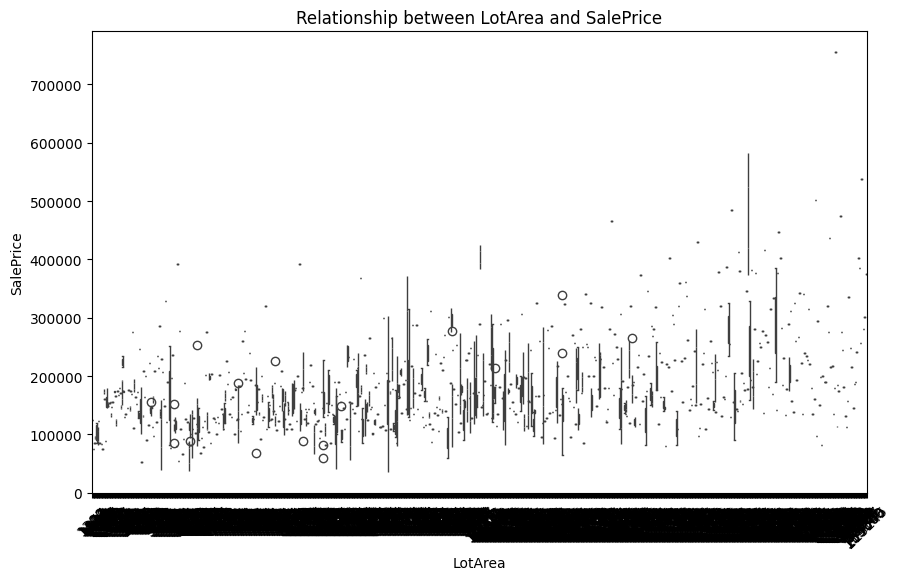

"\n# Bar plot\nplt.figure(figsize=(10, 6))\nsns.barplot(x=discrete_variable, y=sales_price, data=data1, estimator=pd.Series.median)\nplt.title('Relationship between {} and {}'.format(discrete_variable, sales_price))\nplt.xlabel(discrete_variable)\nplt.ylabel('Median ' + sales_price)\nplt.xticks(rotation=45)\nplt.show()"

In [35]:
#Q7) On the Discrete Variable  Find the relationship between Discrete and Sales price

import pandas as pd
# Select the discrete variable and sales price
discrete_variable = 'LotArea'
sales_price = 'SalePrice'

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=discrete_variable, y=sales_price, data=data1)
plt.title('Relationship between {} and {}'.format(discrete_variable, sales_price))
plt.xlabel(discrete_variable)
plt.ylabel(sales_price)
plt.xticks(rotation=45)
plt.show()

'''
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=discrete_variable, y=sales_price, data=data1, estimator=pd.Series.median)
plt.title('Relationship between {} and {}'.format(discrete_variable, sales_price))
plt.xlabel(discrete_variable)
plt.ylabel('Median ' + sales_price)
plt.xticks(rotation=45)
plt.show()'''

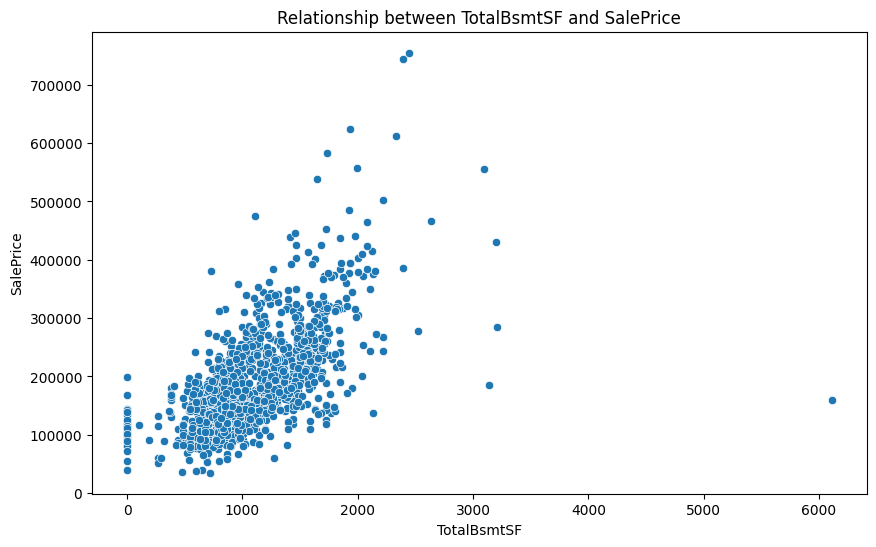

In [37]:
# Q8) On the Continous Variable  Find the relationship between Discrete and Sales Price

# Select the continuous variable and sales price
continuous_variable = 'TotalBsmtSF'
sales_price = 'SalePrice'

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=continuous_variable, y=sales_price, data=data1)
plt.title('Relationship between {} and {}'.format(continuous_variable, sales_price))
plt.xlabel(continuous_variable)
plt.ylabel(sales_price)
plt.show()

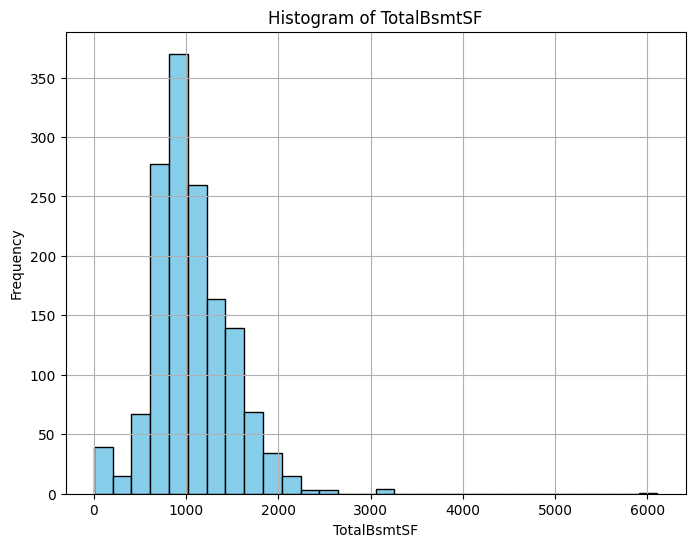

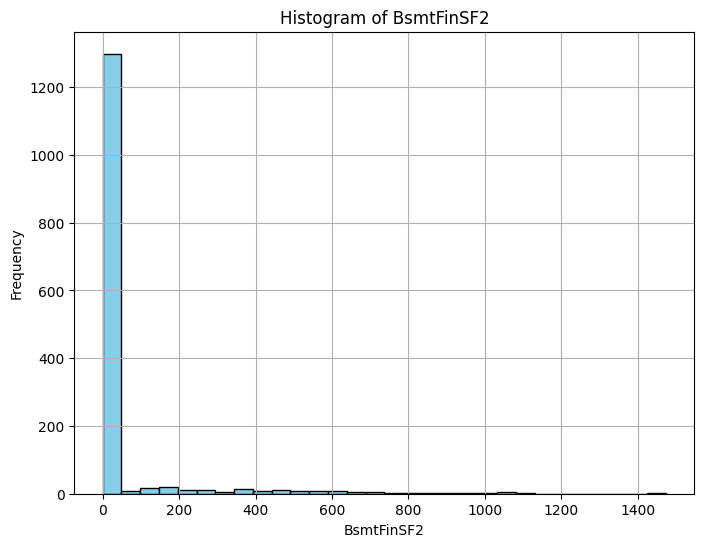

In [38]:
# Q9) Analyse the Continous values by creating the histogram to understand the distribution.

# Select continuous variables
continuous_variables = ['TotalBsmtSF', 'BsmtFinSF2']  # Add your continuous variable names

# Create histograms for each continuous variable
for var in continuous_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data1[var], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.title('Histogram of {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [39]:
# Q10) Apply the Lograthmic Transformation

# Select continuous variables
continuous_variables = ['TotalBsmtSF', 'BsmtFinSF2']  # Add your continuous variable names

# Apply logarithmic transformation to each continuous variable
for var in continuous_variables:
    data1[var] = np.log1p(data1[var])

# Display the transformed DataFrame
print(data1.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0     6.753438   208500.0  
1       1976          1976     MetalSd         0.0     7.141245   181500.0  
2       2001          2002     VinylSd         0.0     6.825460   223500.0  
3       1915          1970     Wd Sdng         0.0     6.629363   140000.0  
4       2000          2000     VinylSd         0.0     7.044033   250000.0  


In [42]:
# Task 3------
#Q1) Find the Outliers
# Select continuous variables
continuous_variables = ['TotalBsmtSF', 'BsmtFinSF2']  # Add your continuous variable names

# Find outliers using the IQR method
outliers = {}
for var in continuous_variables:
    Q1 = data1[var].quantile(0.25)
    Q3 = data1[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = data1[(data1[var] < lower_bound) | (data1[var] > upper_bound)]

# Display outliers
for var, outlier_df in outliers.items():
    print("Outliers for {}: ".format(var))
    print("Display outliers")
    print(outlier_df)
    print()

Outliers for TotalBsmtSF: 
Display outliers
        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
17      17          90       RL    10791    Inside   Duplex            5   
39      39          90       RL     6040    Inside   Duplex            5   
90      90          20       RL     7200    Inside     1Fam            5   
102    102          90       RL     7018    Inside   Duplex            5   
156    156          20       RL     7200    Inside     1Fam            7   
182    182          20       RL     9060    Inside     1Fam            6   
259    259          20       RM    12702    Inside     1Fam            5   
307    307          50       RM     7920    Inside     1Fam            7   
332    332          20       RL    10655    Inside     1Fam            5   
342    342          90       RL     8544    Inside   Duplex            4   
362    362          85       RL     7301    Corner     1Fam            5   
371    371          50       RL    17120    

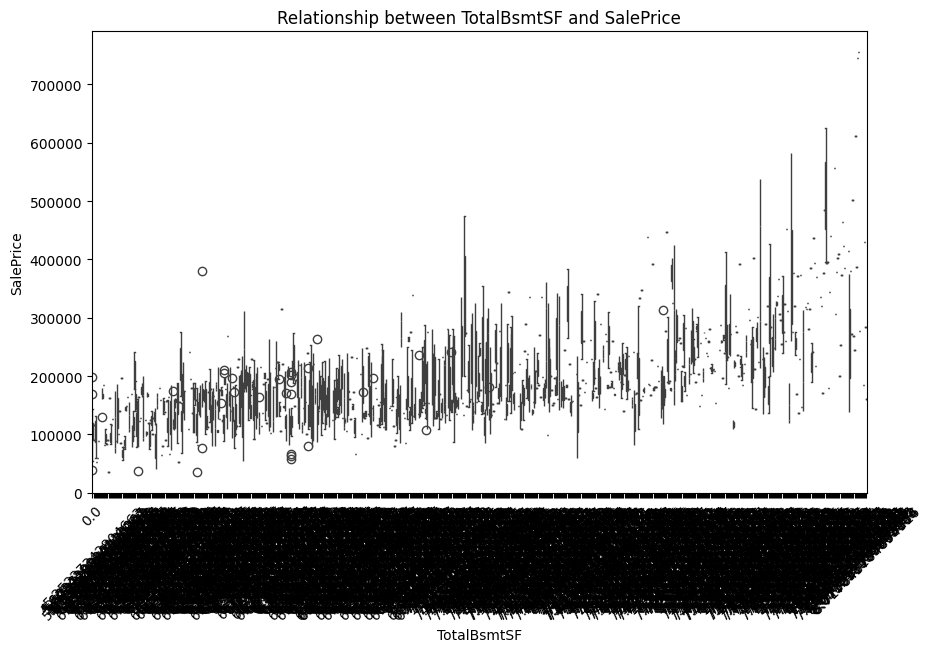

In [45]:
#Q2) Find the relationship between Categorical  feature and Sales Price

 #Select the categorical feature and sales price

categorical_feature = 'TotalBsmtSF'
sales_price = 'SalePrice'

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_feature, y=sales_price, data=data1)
plt.title('Relationship between {} and {}'.format(categorical_feature, sales_price))
plt.xlabel(categorical_feature)
plt.ylabel(sales_price)
plt.xticks(rotation=45)
plt.show()



In [46]:
#Q3) Find the Correlation between Numerical Features and Sales Price

# Select numerical features and sales price
numerical_features = data1.select_dtypes(include=['int64', 'float64']).columns
sales_price = 'SalePrice'

# Calculate the correlation matrix
correlation_matrix = data1[numerical_features].corrwith(data1[sales_price])

# Print the correlation with sales price for each numerical feature
print("Correlation with Sales Price:")
print(correlation_matrix)

Correlation with Sales Price:
Id             -0.021917
MSSubClass     -0.084284
LotArea         0.263843
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF2     -0.048267
TotalBsmtSF     0.325883
SalePrice       1.000000
dtype: float64


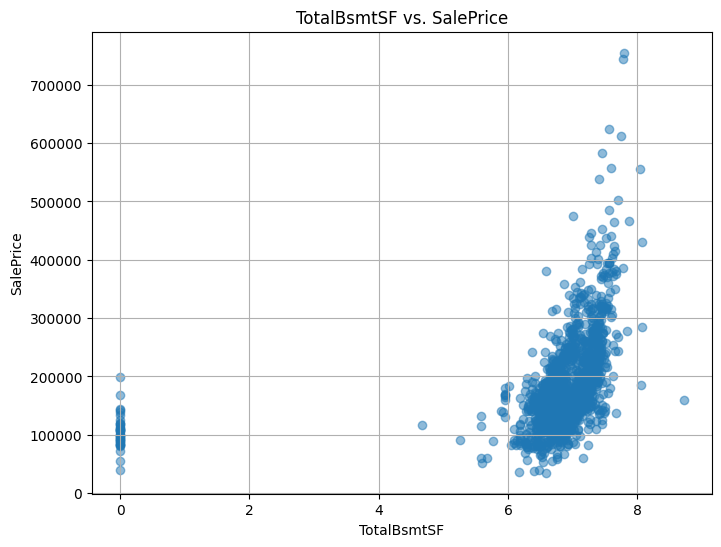

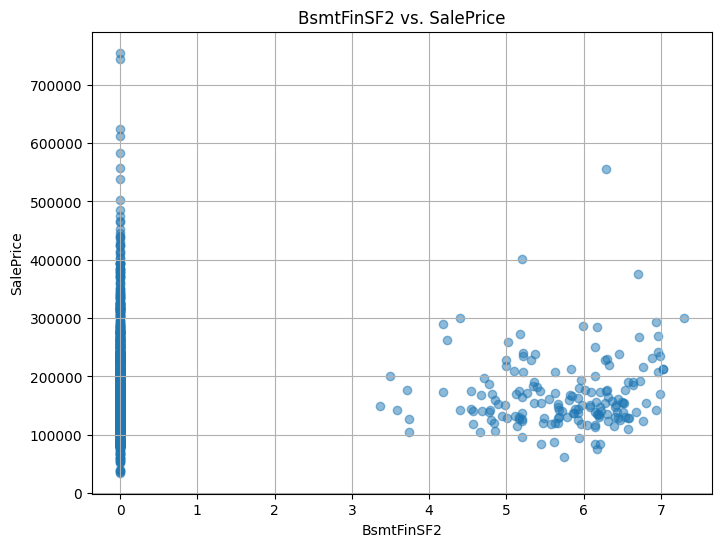

In [47]:
#Q4) Find Continous  Features vs  Sales Price
# Select continuous features and sales price
continuous_features = ['TotalBsmtSF', 'BsmtFinSF2']  # Add your continuous feature names
sales_price = 'SalePrice'

# Create scatter plots for each continuous feature vs. sales price
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data1[feature], data1[sales_price], alpha=0.5)
    plt.title('{} vs. {}'.format(feature, sales_price))
    plt.xlabel(feature)
    plt.ylabel(sales_price)
    plt.grid(True)
    plt.show()

In [55]:
'''Q5) Do the Feature Engineering for the
		a)Handle the Missing Values
		b) Handle the Categorical Variables
		c) Handle  the Numerical Variables
		d) Handling  the Temporal Varaibles'''


# a) Handle Missing Values
# Replace missing values in numerical variables with the mean
numerical_features = data1.select_dtypes(include=['int64', 'float64']).columns
data1[numerical_features] = data1[numerical_features].fillna(data1[numerical_features].mean())

# Replace missing values in categorical variables with mode
categorical_features = data1.select_dtypes(include=['object']).columns
#data1[categorical_features] = data1[categorical_features].fillna(data1[categorical_features].mode().iloc[0])

# b) Handle Categorical Variables
# One-hot encoding for categorical variables
data1 = pd.get_dummies(data1, columns=categorical_features, drop_first=True)

# c) Handle Numerical Variables
# Min-Max scaling for numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[numerical_features] = scaler.fit_transform(data1[numerical_features])

# d) Handle Temporal Variables
# Extract year, month, and day from temporal variables
#data1['YearBuilt'] = pd.to_datetime(data1['YearBuilt']).data1.year
#data1['Month'] = pd.to_datetime(data1['Date']).data1.month
#data1['Day'] = pd.to_datetime(data1['Date']).data1.day
#data1.drop('Date', axis=1, inplace=True)  # Drop the original temporal variable

# Display the processed DataFrame
print(data1.head())

         Id  MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0  0.000000    0.235294  0.033420        0.500   0.949275      0.883333   
1  0.000685    0.000000  0.038795        0.875   0.753623      0.433333   
2  0.001371    0.235294  0.046507        0.500   0.934783      0.866667   
3  0.002056    0.294118  0.038561        0.500   0.311594      0.333333   
4  0.002742    0.235294  0.060576        0.500   0.927536      0.833333   

   BsmtFinSF2  TotalBsmtSF  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         0.0     0.774668   0.241078        False        False         True   
1         0.0     0.819153   0.203583        False        False         True   
2         0.0     0.782930   0.261908        False        False         True   
3         0.0     0.760436   0.145952        False        False         True   
4         0.0     0.808002   0.298709        False        False         True   

   MSZoning_RM  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0